In [87]:
# Importing libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file = "../2023-10-31 5_50pm.csv"
target_columns = ['CREATED_AT','AHT_LS', 'SURVEY_RATING', 'FRT_QUEUE', 'SLA']

In [88]:
def read_csv(file_name, column_names):
    for chunk in pd.read_csv(filepath_or_buffer=file_name, chunksize=10e6, low_memory=False, usecols=column_names): # type: ignore
        yield chunk

In [89]:
'''
# For building DataFrame chunk by chunk
data = pd.DataFrame()
for df_chunk in read_csv(file_name=file, column_names=target_columns):
    df_chunk = df_chunk.dropna()
    data = pd.concat(objs=[data,df_chunk])
    
    # checking data increase
    data_size = sys.getsizeof(data)             # Gives results in bytes
    data_size = data_size * (1/1024)            # Calculate memory in kb
    if data_size > 10e6:                        # Fails if the data requires more than 10 GB in memory
        print(f"Datos escalando en memoria")
        sys.exit()
'''

'\n# For building DataFrame chunk by chunk\ndata = pd.DataFrame()\nfor df_chunk in read_csv(file_name=file, column_names=target_columns):\n    df_chunk = df_chunk.dropna()\n    data = pd.concat(objs=[data,df_chunk])\n    \n    # checking data increase\n    data_size = sys.getsizeof(data)             # Gives results in bytes\n    data_size = data_size * (1/1024)            # Calculate memory in kb\n    if data_size > 10e6:                        # Fails if the data requires more than 10 GB in memory\n        print(f"Datos escalando en memoria")\n        sys.exit()\n'

In [90]:
data = pd.read_csv(filepath_or_buffer=file, usecols=target_columns)
data = data.dropna()
data_size = sys.getsizeof(data)       # gives results in bytes
data_size = data_size * (1/1024)
print(f"Dataframe size : {data_size/1000} MB")

Dataframe size : 4.952072265625 MB


array([[<Axes: title={'center': 'CREATED_AT'}>,
        <Axes: title={'center': 'SURVEY_RATING'}>,
        <Axes: title={'center': 'FRT_QUEUE'}>],
       [<Axes: title={'center': 'AHT_LS'}>,
        <Axes: title={'center': 'SLA'}>,
        <Axes: title={'center': 'CREATED_AT_YEAR'}>],
       [<Axes: title={'center': 'CREATED_AT_MONTH'}>,
        <Axes: title={'center': 'CREATED_AT_HOUR'}>, <Axes: >]],
      dtype=object)

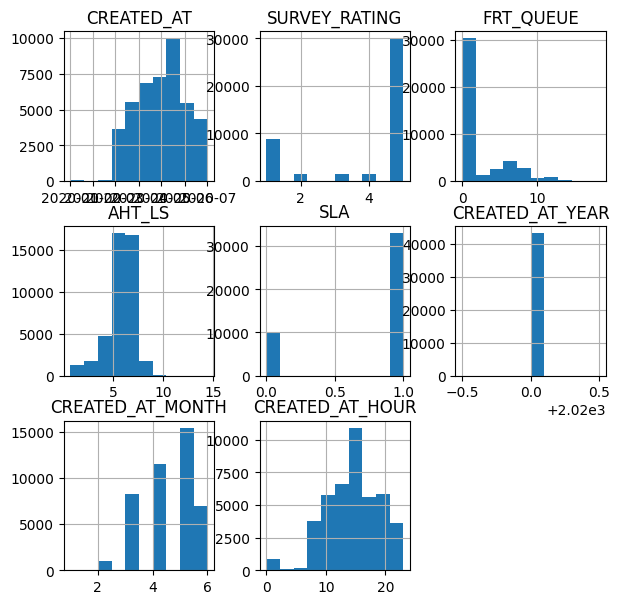

In [103]:
# Histograms for raw data
data.hist(figsize=(7,7))

In [104]:
data['CREATED_AT'] = data['CREATED_AT'].apply(func= lambda x : pd.to_datetime(x))
data['CREATED_AT'] = data['CREATED_AT'].dt.tz_localize(tz=None)
data['CREATED_AT_YEAR'] = data['CREATED_AT'].dt.year
data['CREATED_AT_MONTH'] = data['CREATED_AT'].dt.month
data['CREATED_AT_HOUR'] = data['CREATED_AT'].dt.hour

data = data.sort_values(by=['CREATED_AT'], ascending=True)
data = data.reset_index(drop=True)

In [93]:
# Unskeew data
data['AHT_LS'] = np.log(data['AHT_LS'] + 1)
data['FRT_QUEUE'] = np.log(data['FRT_QUEUE'] + 1)

array([[<Axes: title={'center': 'CREATED_AT_HOUR'}>,
        <Axes: title={'center': 'CREATED_AT_MONTH'}>],
       [<Axes: title={'center': 'AHT_LS'}>,
        <Axes: title={'center': 'SURVEY_RATING'}>],
       [<Axes: title={'center': 'FRT_QUEUE'}>,
        <Axes: title={'center': 'SLA'}>]], dtype=object)

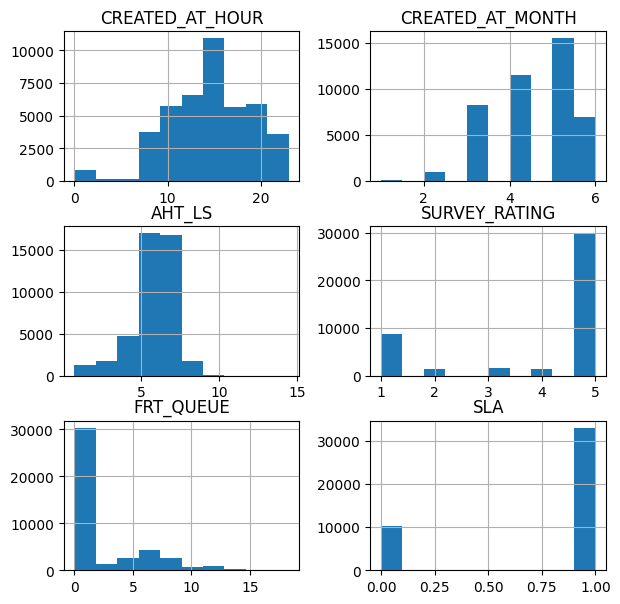

In [105]:
target_cols = ['CREATED_AT_HOUR', 'CREATED_AT_MONTH', 'AHT_LS', 'SURVEY_RATING', 'FRT_QUEUE', 'SLA']
# Histogram for data distribution
data[target_cols].hist(figsize=(7,7))

<Axes: >

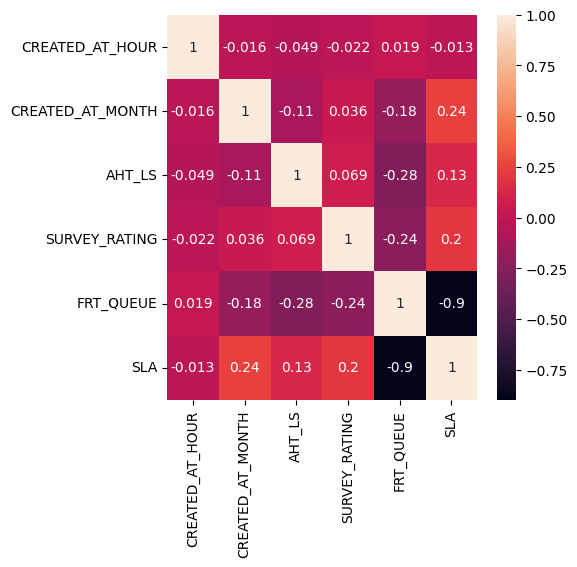

In [100]:
# Heatmap with the correlations between data
plt.figure(figsize=(5,5))
sns.heatmap(data[target_cols].corr(), annot=True)

c:\Users\user\Documents\Repositorios personales\Concentrix\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\Documents\Repositorios personales\Concentrix\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\Documents\Repositorios personales\Concentrix\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\Documents\Repositorios personales\Concentrix\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\Documents\Repositorios personales\Concentrix\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserW

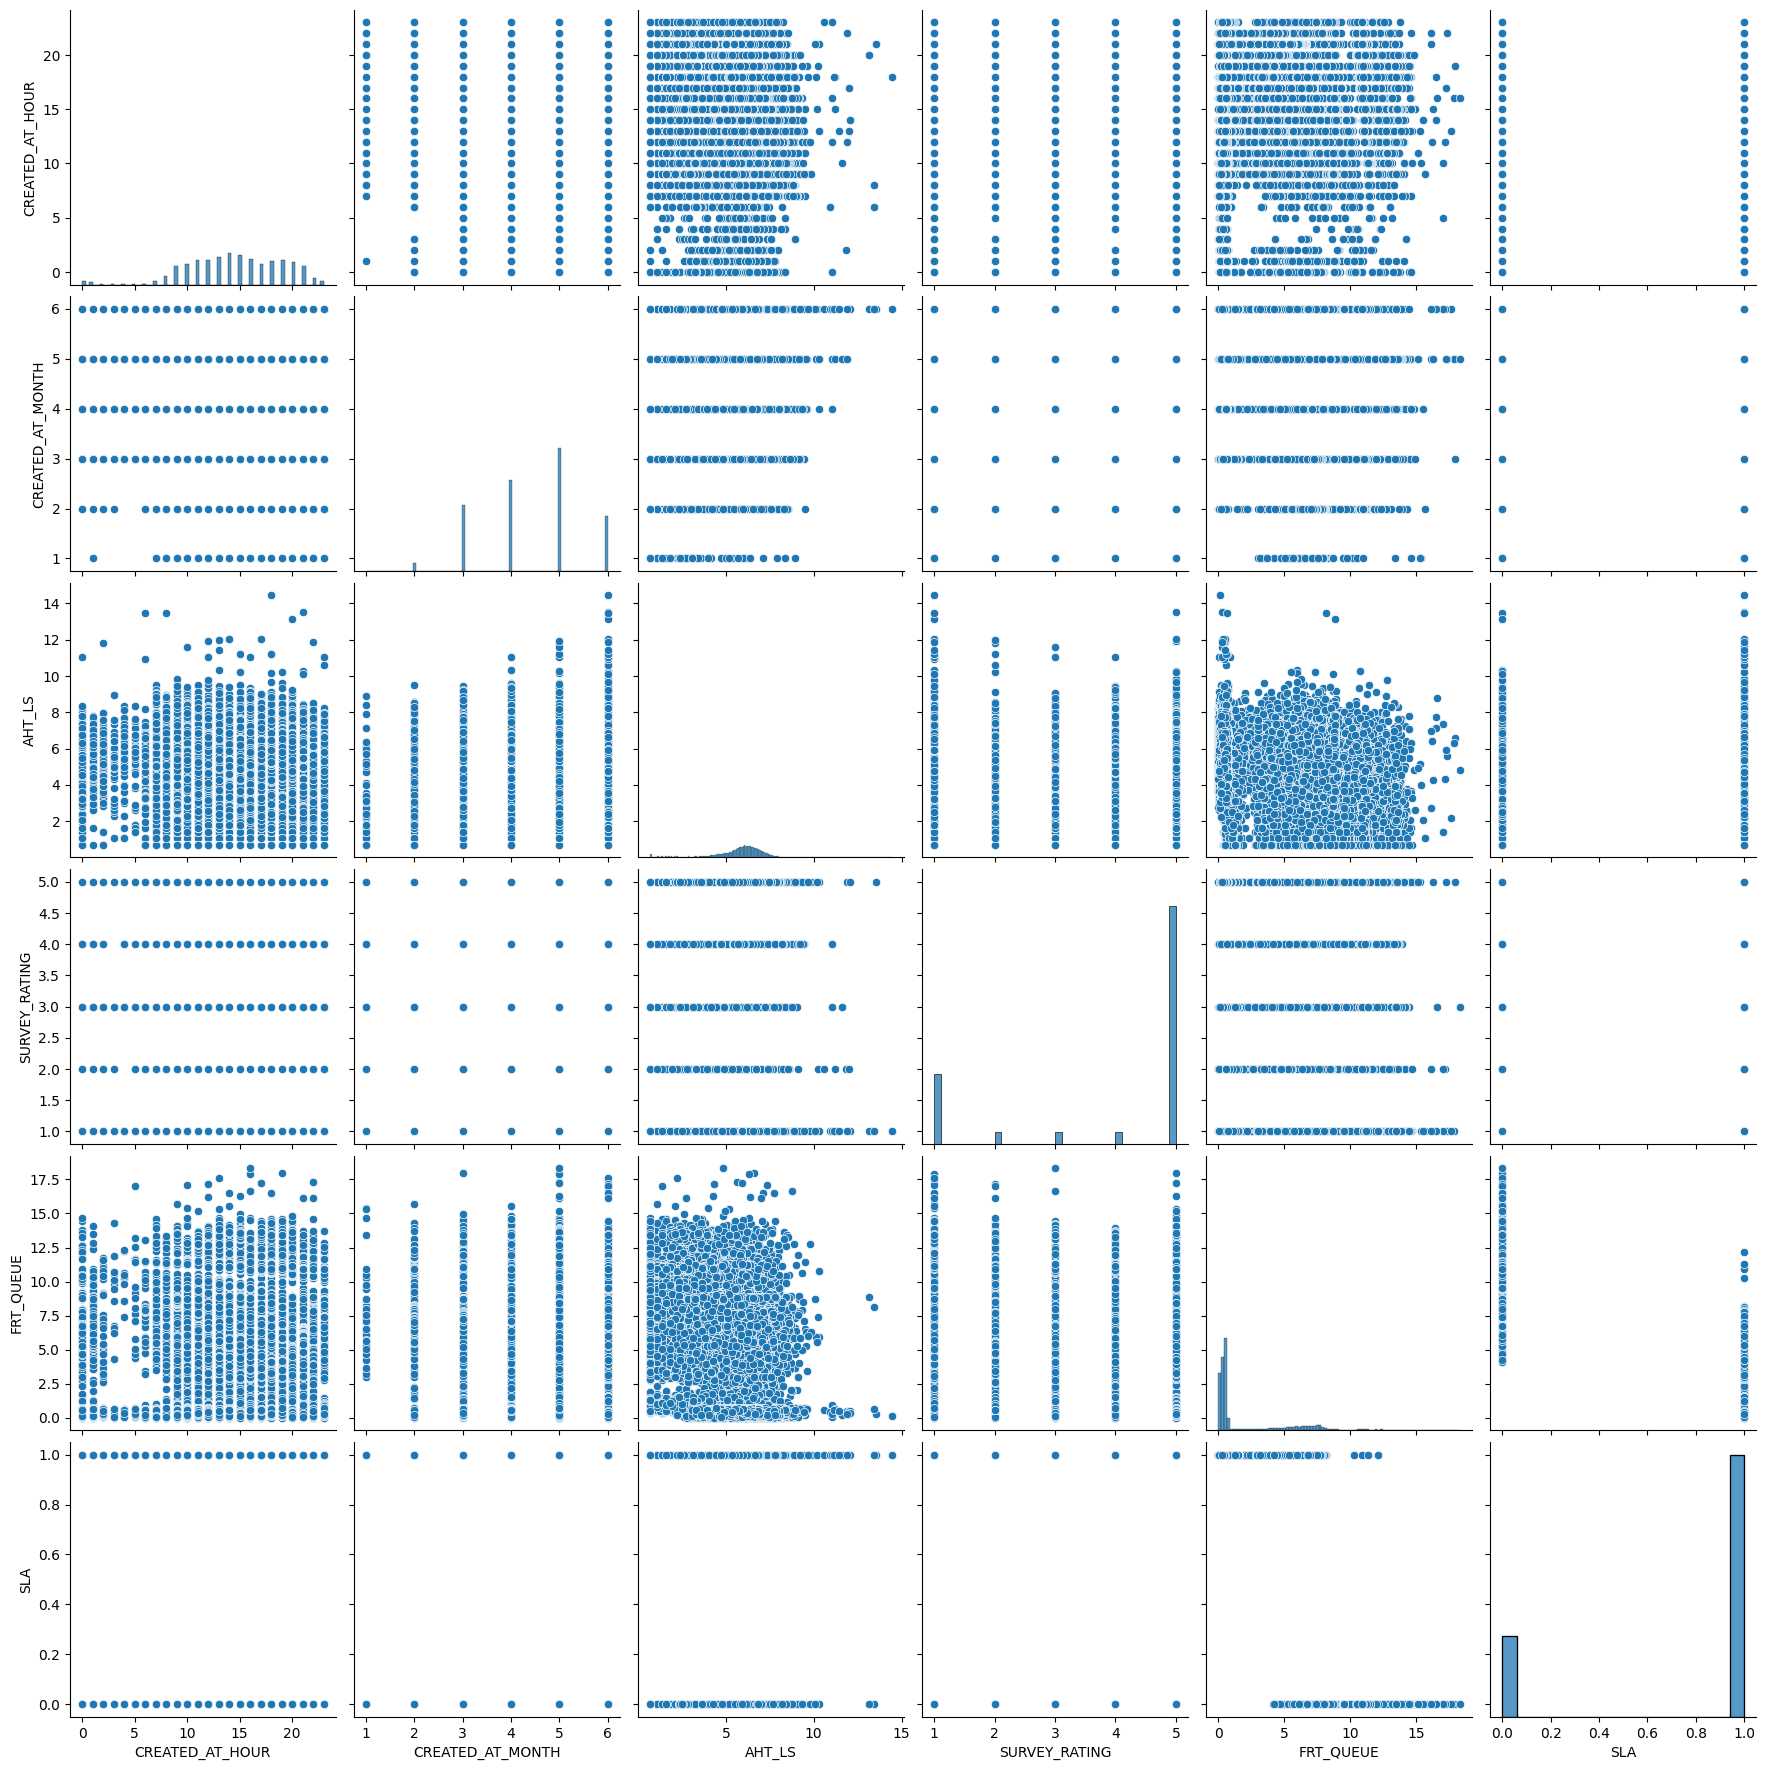

In [106]:
# sns.pairplot(data=data[target_cols], hue=None, palette="husl", size=3)

In [96]:
data.shape

(43209, 8)

In [114]:
# For problem #1
'''
Se ha observado una variabilidad en el tiempo promedio de manejo (AHT) de las interacciones con los clientes. 
El objetivo es entender las variables que más influyen en el AHT y construir un modelo explicativo que ayude a 
identificar áreas de mejora y optimización.

# Predict AHT_LS
'''
from sklearn.model_selection import train_test_split

# Selecting variables and splitting dataset -- stage
X = data.drop(labels=['AHT_LS','CREATED_AT', 'CREATED_AT_YEAR'], axis=1)
y = data['AHT_LS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

train_data = X_train.join(y_train)
train_data.head()

# Scaling dataset -- stage
from sklearn.preprocessing import MinMaxScaler
standart_scaler_X = MinMaxScaler()
standart_scaler_X.fit(X=X_train)
X_train_scaled = standart_scaler_X.transform(X=X_train)
X_test_scaled = standart_scaler_X.transform(X=X_test)

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

forest_regresor = RandomForestRegressor()
forest_regresor.fit(X = X_train_scaled, y = y_train)
score_F1 = forest_regresor.score(X = X_train_scaled, y = y_train)
score_F2 = forest_regresor.score(X = X_test_scaled, y = y_test)
print(f"The mean accuracy for RandomForest {round(score_F1,3)} -- {round(score_F2,3)}")


knn_regresor = KNeighborsRegressor()
knn_regresor.fit(X = X_train_scaled, y = y_train)
score_F1 = knn_regresor.score(X = X_train_scaled, y = y_train)
score_F2 = knn_regresor.score(X = X_test_scaled, y = y_test)
print(f"The mean accuracy for Knn {round(score_F1,3)} -- {round(score_F2,3)}")


lin_regresor = LinearRegression()
lin_regresor.fit(X = X_train_scaled, y = y_train)
score_F1 = lin_regresor.score(X = X_train_scaled, y = y_train)
score_F2 = lin_regresor.score(X = X_test_scaled, y = y_test)
print(f"The mean accuracy for linreg {round(score_F1,3)} -- {round(score_F2,3)}")

The mean accuracy for RandomForest 0.853 -- 0.11
The mean accuracy for Knn 0.412 -- 0.12
The mean accuracy for linreg 0.163 -- 0.158


Text(0, 0.5, 'ln(AHT_LS) + 1')

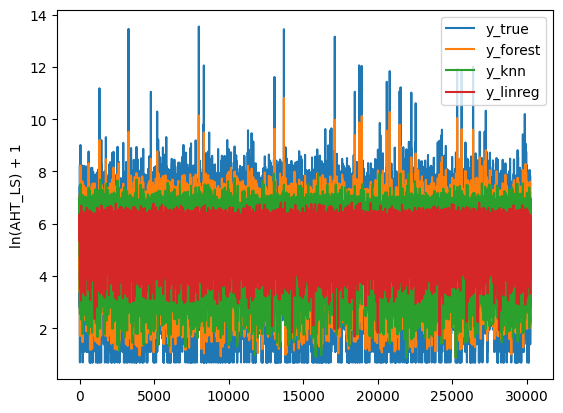

In [133]:
# baseline_train = y_train.reset_index(drop=True,inplace=True)
baseline_train = y_train
plt.plot(baseline_train, label='y_true')
plt.plot(forest_regresor.predict(X=X_train_scaled), label='y_forest')
plt.plot(knn_regresor.predict(X=X_train_scaled), label='y_knn')
plt.plot(lin_regresor.predict(X=X_train_scaled), label='y_linreg')
plt.legend()
plt.ylabel(ylabel='ln(AHT_LS) + 1')

In [131]:
baseline_train = y_train.reset_index(drop=True,inplace=True)
print(y_train)


0        2.952929
1        5.023624
2        6.959558
3        6.803550
4        6.439561
           ...   
30241    5.302927
30242    6.083262
30243    6.067200
30244    6.146393
30245    6.375193
Name: AHT_LS, Length: 30246, dtype: float64


In [99]:
# For problem #2
'''
El CSAT puede variar según diversos factores, como la calidad de la entrega, la precisión del pedido, 
la velocidad de entrega y la interacción del usuario con la aplicación. Predecir la satisfacción del cliente 
permitiría intervenir proactivamente en situaciones que podrían afectar negativamente la experiencia del usuario, 
por ello se necesita un modelo de Forecasting para predecir el CSAT. 
'''

'\nEl CSAT puede variar según diversos factores, como la calidad de la entrega, la precisión del pedido, \nla velocidad de entrega y la interacción del usuario con la aplicación. Predecir la satisfacción del cliente \npermitiría intervenir proactivamente en situaciones que podrían afectar negativamente la experiencia del usuario, \npor ello se necesita un modelo de Forecasting para predecir el CSAT. \n'